<a href="https://colab.research.google.com/github/alpolo1991/Unsupervised_Learning_Algorithms/blob/main/hierarchical_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hierarchical Clustering

## Algoritmos de Aprendizaje No Supervisado

### Segmentación de Clientes en un Centro Comercial

**Descripción:**

El objetivo de este análisis es demostrar la segmentación de clientes mediante el algoritmo de clustering jerárquico (Hierarchical Clustering). Este enfoque permitirá comprender mejor el perfil de los clientes del centro comercial, identificar posibles segmentos clave.
### **Objetivo**
Comprender mejor a los clientes mediante la segmentación, identificando características clave que permitan personalizar estrategias y mejorar la experiencia del cliente.

**Pasos generales:**

1. Análisis exploratorio de los datos (EDA).
2. Preprocesamiento de datos.
3. Selección de características.
4. Entrenamiento del modelo de clustering jerárquico.
5. Evaluación del modelo.
6. Visualización de resultados.
7. Interpretación y documentación.
8. Carga del código en GitHub.


### Versión de Python

In [5]:
# Importar bibliotecas
import pandas as pd # Cargar y manipular el dataset.
import numpy as np # Realizar cálculos numéricos.
import matplotlib.pyplot as plt # Para la visualización de datos.
import seaborn as sns # Para la visualización de datos.
import plotly.express as px # Para la visualización de datos.

# Configuración de estilo
sns.set(style="whitegrid")

#Warnings
import warnings
warnings.filterwarnings('ignore')

## 1. Cargar y explorar el conjunto de datos

En esta sección cargaremos el conjunto de datos y exploraremos sus características principales, como el tamaño del dataset, tipos de datos y valores nulos.

**Actividades:**

- Cargar el dataset.
- Inspeccionar las primeras filas.
- Verificar dimensiones, tipos de datos y valores nulos.
- Generar estadísticas descriptivas.
- Visualizar la distribución de variables y relaciones.

In [17]:
# Cargar el conjunto de datos
file_path = './Mall_Customers.csv'
df_mall_data = pd.read_csv(file_path)

## 2. Análisis Exploratorio de los Datos (EDA)

**Objetivo:**

Entender las relaciones entre variables, identificar valores atípicos, tendencias y patrones importantes en los datos. Esto incluye explorar los datos demográficos de los clientes y métricas clave como ingresos y puntaje de gastos.


#### Nombre de columnas y cantidad de filas y columnas.

In [21]:
# Nombre de columnas y cantidad de filas y columnas.
print("Nombre de columnas y cantidad de filas y columnas: ")
df_mall_data.columns.values.tolist()

Nombre de columnas y cantidad de filas y columnas: 


['CustomerID', 'genero', 'edad', 'ingresos_anuales', 'puntuacion_gasto']

#### Exploración básica del dataset

In [24]:
# Exploración básica del dataset
print("Tamaño del dataset:", df_mall_data.shape)

Tamaño del dataset: (200, 5)


#### Primeras filas del dataset

In [27]:
print("Primeras filas del dataset:")
display(df_mall_data.head())


Primeras filas del dataset:


,CustomerID,genero,edad,ingresos_anuales,puntuacion_gasto
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Información del dataset

In [30]:
print("Información del dataset:")
df_mall_data.info()

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   CustomerID        200 non-null    int64 
 1   genero            200 non-null    object
 2   edad              200 non-null    int64 
 3   ingresos_anuales  200 non-null    int64 
 4   puntuacion_gasto  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


**Información de las columnas:**

- **CustomerID:**
  - Identificador único de cliente (entero, no necesario para el análisis).
- **Gender:**
  - Género del cliente (categórico: Male/Female).
- **Age:**
  - Edad del cliente (numérico).
- **Annual** Income (k$):
  - Ingreso anual en miles de dólares (numérico).
- **Spending Score (1-100):**
  - Puntaje basado en el comportamiento y datos de compra (numérico).

#### Resumen estadístico de las variables numéricas

In [34]:
# Resumen estadístico de las variables numéricas
print("Resumen estadístico:")
display(df_mall_data.describe())

Resumen estadístico:


,CustomerID,edad,ingresos_anuales,puntuacion_gasto
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


**Resumen estadístico de las variables numéricas:**
1. Age:
  * Rango entre 18 y 70 años, con una media de 38.85.
2. Annual Income (k$):
  
  * Rango entre 15 y 137 k$, con una media de 60.56.
3. Spending Score (1-100):
  * Rango entre 1 y 99, con una media de 50.2.

#### Identificar valores nulos

In [38]:
# Identificar valores nulos
print("Valores nulos por columna:")
print(df_mall_data.isnull().sum())

Valores nulos por columna:
CustomerID          0
genero              0
edad                0
ingresos_anuales    0
puntuacion_gasto    0
dtype: int64


**No hay valores faltantes en el dataset.**

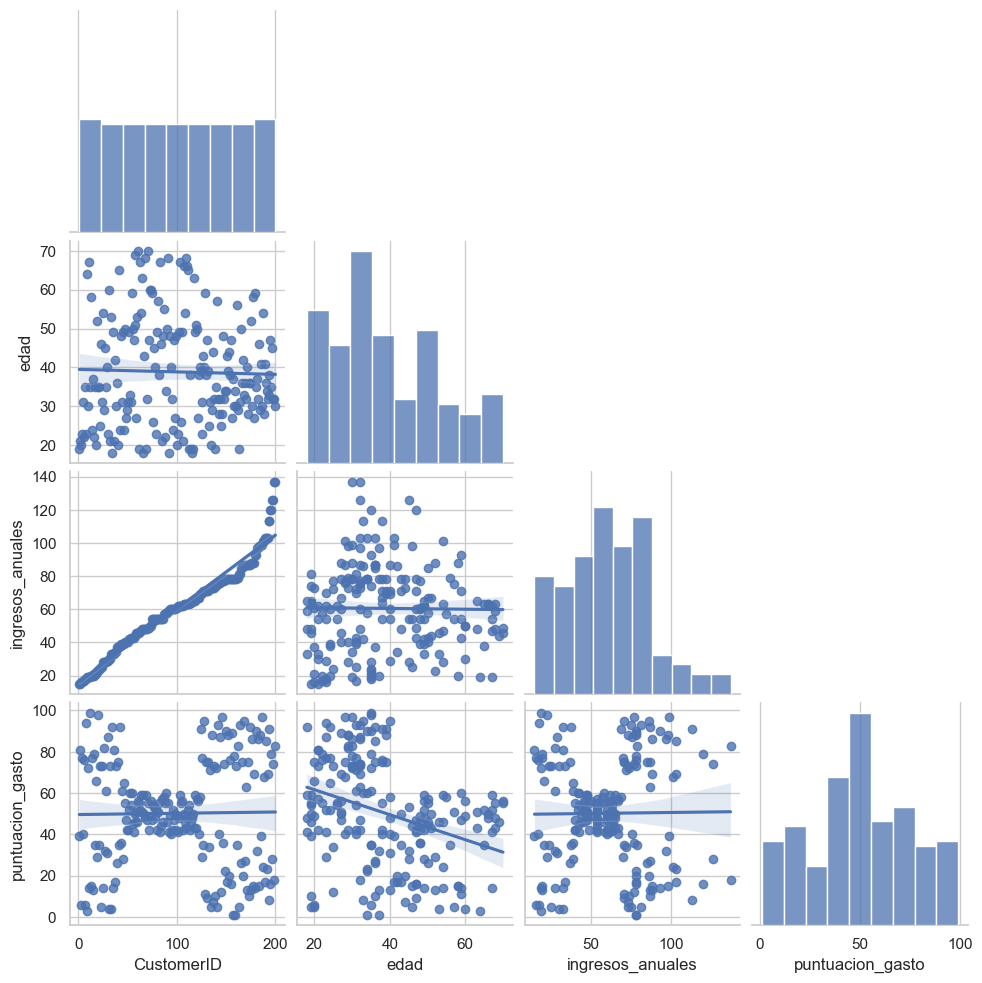

In [50]:
# Visualización de distribuciones y relaciones
sns.pairplot(df_mall_data, kind='reg', corner=True)
plt.show()

#### Visualización de distribuciones de variables numericas

#### Visualización del impacto de Gender en Age, Annual Income y Spending Score

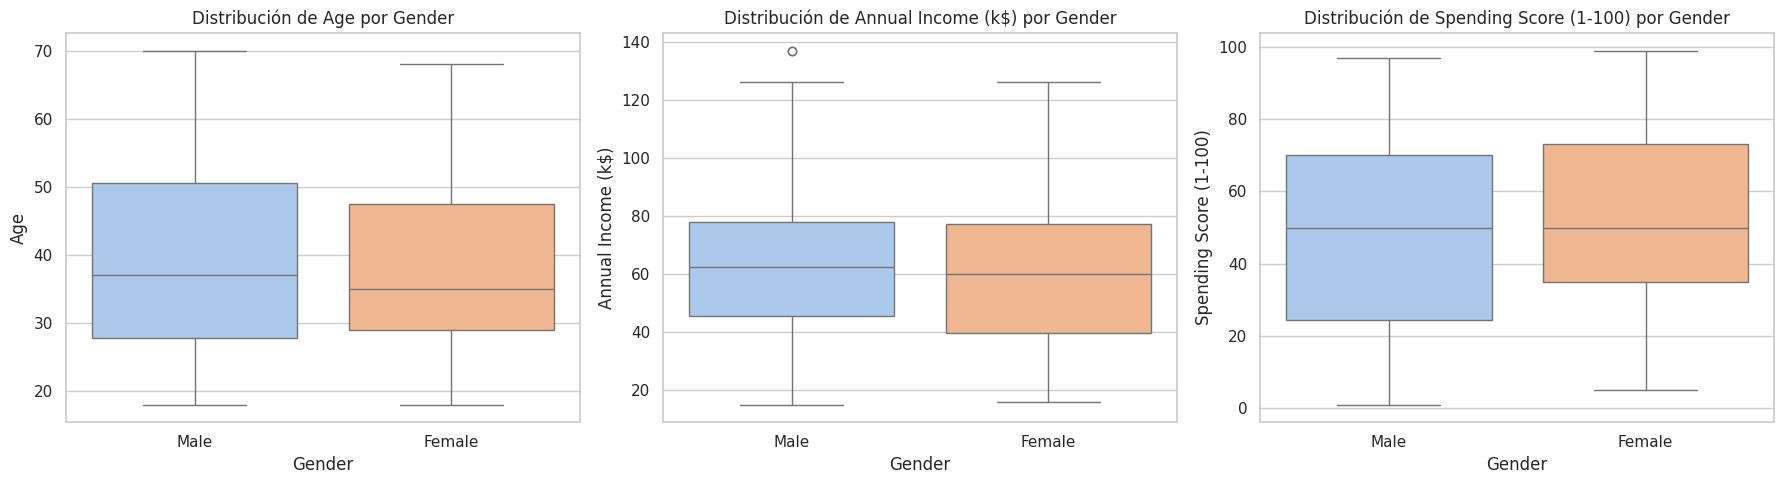

In [9]:
# Visualización del impacto de Gender en Age, Annual Income y Spending Score
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot de Age por Gender
sns.boxplot(x='Gender', y='Age', data=df_mall_data, ax=axes[0], palette="pastel")
axes[0].set_title("Distribución de Age por Gender")

# Boxplot de Annual Income por Gender
sns.boxplot(x='Gender', y='Annual Income (k$)', data=df_mall_data, ax=axes[1], palette="pastel")
axes[1].set_title("Distribución de Annual Income (k$) por Gender")

# Boxplot de Spending Score por Gender
sns.boxplot(x='Gender', y='Spending Score (1-100)', data=df_mall_data, ax=axes[2], palette="pastel")
axes[2].set_title("Distribución de Spending Score (1-100) por Gender")

plt.tight_layout()
plt.show()

**Los boxplots revelan lo siguiente:**

1. Age por Gender:

  * No hay una diferencia significativa en la mediana de edad entre hombres y mujeres.
  * La distribución de edades es similar para ambos géneros.

2. Annual Income (k$) por Gender:

  * Tanto hombres como mujeres tienen distribuciones de ingresos anuales similares, sin grandes diferencias en los rangos o medianas.

3. Spending Score (1-100) por Gender:

  * Las mujeres parecen mostrar una mayor variabilidad en el puntaje de gasto, pero las medianas son similares entre los géneros.

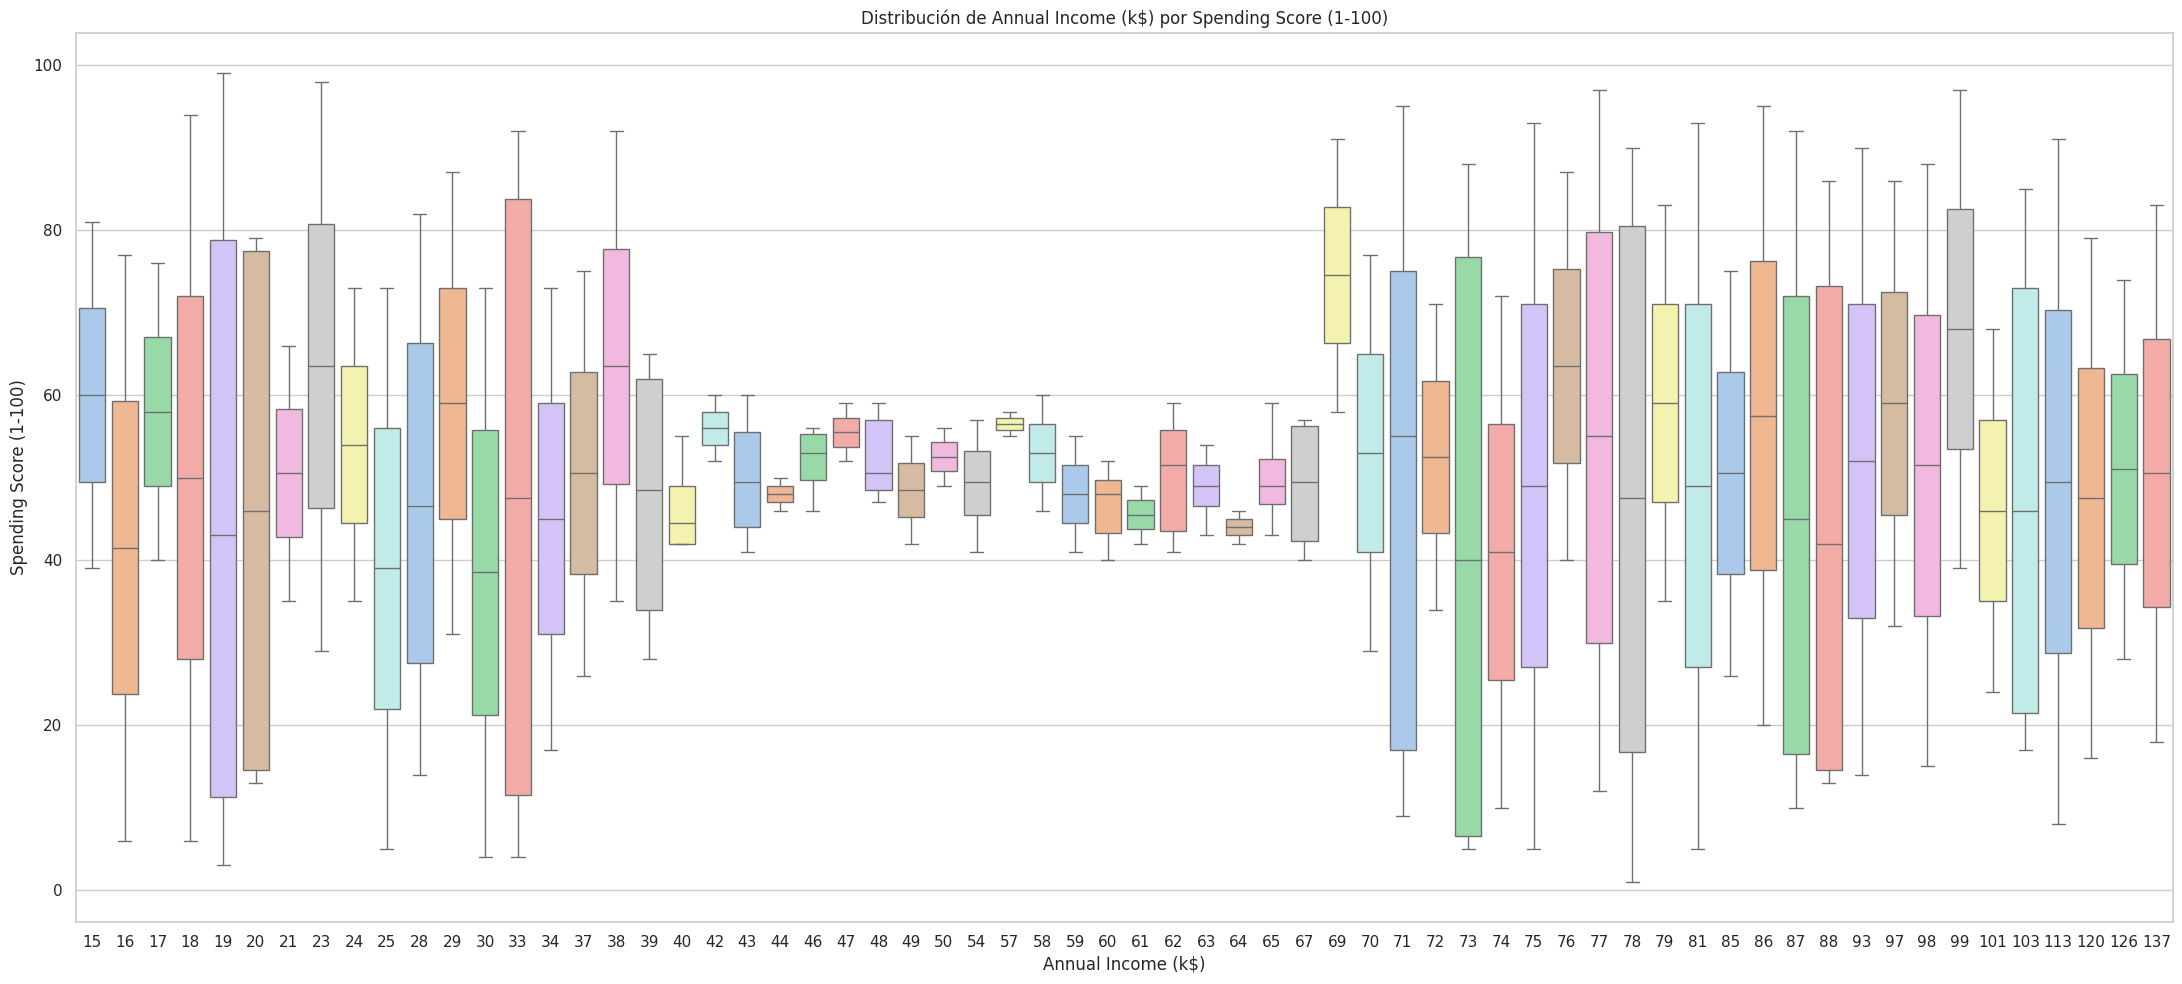

In [21]:
# Visualización del impacto de Gender en Age, Annual Income y Spending Score
fig, axes = plt.subplots(1, figsize=(22, 10))

# Boxplot de Spending Score por Annual Income (k$)
sns.boxplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df_mall_data, ax=axes, palette="pastel")
axes.set_title("Distribución de Annual Income (k$) por Spending Score (1-100)")
axes.set_xlabel("Annual Income (k$)")
axes.set_ylabel("Spending Score (1-100)")

plt.tight_layout()
plt.show()

#### Matriz de correlación

#### Gráficos de dispersión para explorar la relación entre Annual Income y Spending Score (dimensiones críticas para clustering).

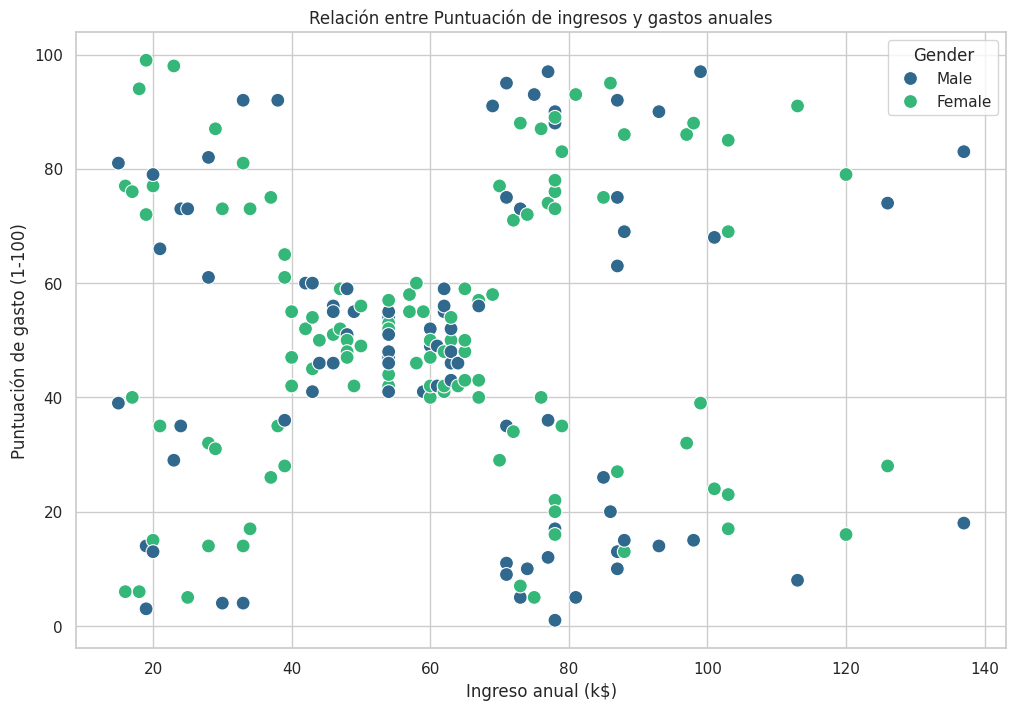

In [22]:
# Gráfico de dispersión entre Annual Income y Spending Score, coloreado por Gender
plt.figure(figsize=(12, 8))
sns.scatterplot(
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    hue='Gender',
    data=df_mall_data,
    palette="viridis",
    s=100
)
plt.title("Relación entre Puntuación de ingresos y gastos anuales")
plt.xlabel("Ingreso anual (k$)")
plt.ylabel("Puntuación de gasto (1-100)")
plt.legend(title="Gender")
plt.show()

**La Grafica de dispersion revela:**

* Que para los generos los gastos de renta son similares.
* El regango se concentran mas en el rango de renta entre los 40 y 80.

## 3. Preprocesamiento de Datos

**Objetivo:**

Preparar los datos para el análisis eliminando valores faltantes, tratando valores atípicos y transformando las variables según sea necesario.

**Actividades:**

- Identificar y manejar valores nulos.
- Transformar variables categóricas en valores numéricos.
- Escalar variables numéricas si es necesario.


#### Verificar valores nulos

In [23]:
# Verificar valores nulos
df_mall_data.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual Income (k$),0
Spending Score (1-100),0


#### Imputar valores faltantes

In [36]:
# Opcional: Imputar valores faltantes
df_mall_data.fillna(method='ffill', inplace=True)

df_mall_data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### Imputar Columna CustomerID -> ID

In [37]:
# Eliminamos Columna CustomerID -> ID
df_mall_data = df_mall_data.drop('CustomerID', axis=1)

df_mall_data.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [38]:
# Transformar variables categóricas
df_mall_data['Gender'] = df_mall_data['Gender'].map({'Male': 1, 'Female': 0})

df_mall_data.head(5)

# Codificación de variables categóricas
# from sklearn.preprocessing import LabelEncoder
# le = LabelEncoder()
# df_mall_data['Genero'] = le.fit_transform(df_mall_data['Genero'])  # Convertir género en valores numéricos

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


#### Escalar las variables relevantes

In [ ]:
# Escalar las variables relevantes
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaled_data = scaler.fit_transform(df_mall_data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

In [42]:
# Manejar valores nulos (rellenar o eliminar)
df_mall_data = df_mall_data.dropna()  # Eliminar filas con valores nulos

df_mall_data.head(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


### Escalamiento de datos

In [45]:
# Escalamiento de datos
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['Gender','Age','Annual Income (k$)', 'Spending Score (1-100)']
df_scaled = scaler.fit_transform(df_mall_data[features])

print("Datos escalados:")
print(df_scaled[:5])

Datos escalados:
[[ 1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [ 1.12815215 -1.28103541 -1.73899919  1.19570407]
 [-0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [-0.88640526 -1.13750203 -1.70082976  1.04041783]
 [-0.88640526 -0.56336851 -1.66266033 -0.39597992]]


#### Seleccionamos solo los datos o columnas númericas - Eliminamos las columnas que no son numericas.

In [46]:
# Seleccionamos solo los datos o columnas númericas
numeric_data = df_mall_data.select_dtypes(include=['number'])

# Eliminamos las columnas que no son numericas.
numeric_data = numeric_data.dropna()

numeric_data.shape

(200, 4)

#### Contamos columnas elimindas.

In [47]:
# Contamos columnas elimindas.
numeric_data.count()
# numeric_data.head()

,0
Gender,200
Age,200
Annual Income (k$),200
Spending Score (1-100),200


#### Grafica Plot Age vs Annual Income (k$)

<Figure size 1200x800 with 0 Axes>

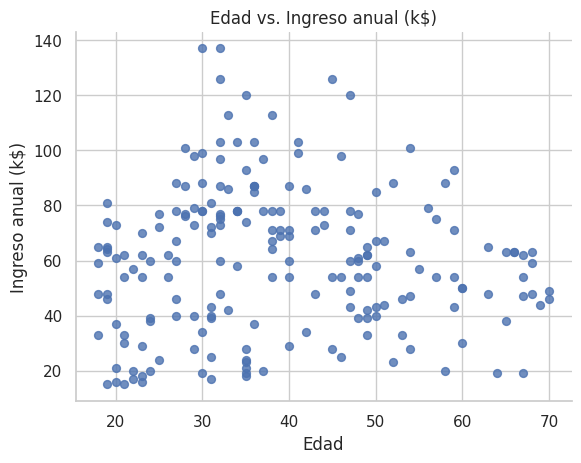

In [49]:
# Edad vs. ingreso anual -> Age vs Annual Income (k$)
plt.figure(figsize=(12, 8))
numeric_data.plot(kind='scatter', x='Age', y='Annual Income (k$)', s=32, alpha=.8)
plt.title('Edad vs. Ingreso anual (k$)')
plt.xlabel('Edad')
plt.ylabel('Ingreso anual (k$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

#### Correlaciones

In [50]:
## Correlaciones
matrix_corr = numeric_data.corr()
matrix_corr

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


## 4. Selección de Características

**Objetivo:**

Seleccionar las características más relevantes para el modelo de clustering jerárquico.

**Actividades:**

- Evaluar correlaciones entre variables.
- Seleccionar variables clave como ingreso anual y puntaje de gasto.

#### Visualizar la correlación con grafica de heatmap

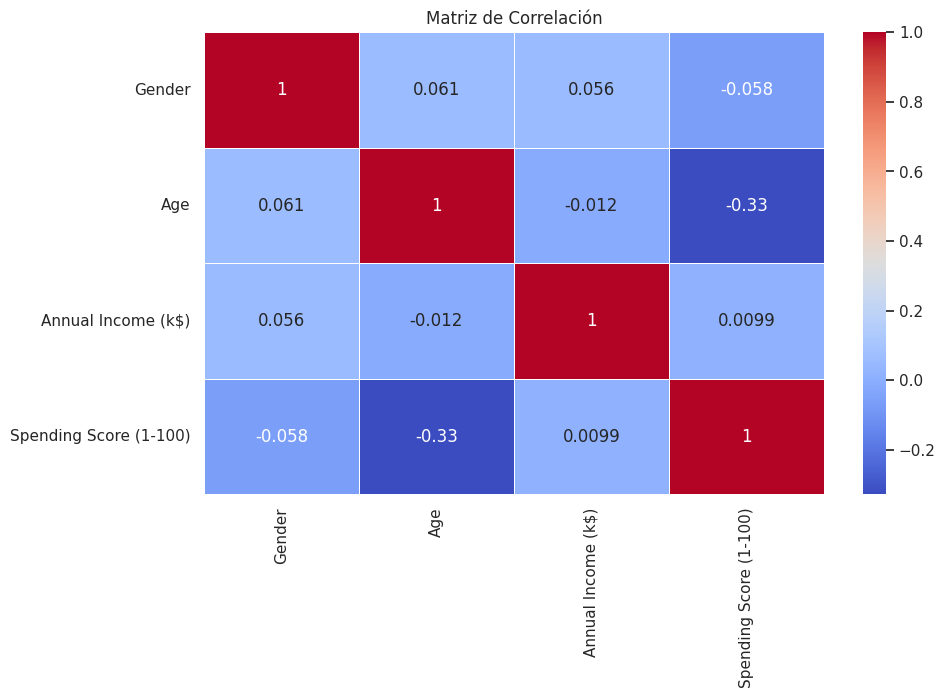

In [52]:
# Visualizar la correlación con un heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(matrix_corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.show()

### Aplicar PCA

In [53]:
# Aplicar PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=4)  # Se puede Reducir a 2 componentes para visualización
df_pca = pca.fit_transform(df_scaled)
print("Varianza explicada por cada componente:", pca.explained_variance_ratio_)

Varianza explicada por cada componente: [0.33690046 0.26230645 0.23260639 0.16818671]


#### Convertir a DataFrame para visualización

In [54]:
# Convertir a DataFrame para visualización
df_pca = pd.DataFrame(df_pca, columns=['Gender','Age','Annual Income (k$)', 'Spending Score (1-100)'])

#### Caracteristicas seleccionas

In [55]:
# Caracteristicas seleccionas
df_pca.head(6)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,-0.406383,-0.520714,2.072527,-1.335529
1,-1.427673,-0.367310,2.277644,-0.082329
2,0.050761,-1.894068,0.367375,-2.174381
3,-1.694513,-1.631908,0.717467,-0.075228
4,-0.313108,-1.810483,0.426460,-0.683070
5,-1.717446,-1.599264,0.696379,-0.153192


## 5. Entrenamiento del Modelo

**Objetivo:**

Entrenar el modelo jerárquico con las variables seleccionadas.

**Actividades:**

- Implementar el modelo de clustering jerárquico.
- Ajustar los hiperparámetros como el método de enlace (ward, complete, average) y la distancia.
- Generar el dendrograma para analizar los grupos.


#### Construcción y Entrenamiento del modelo de clustering jerárquico

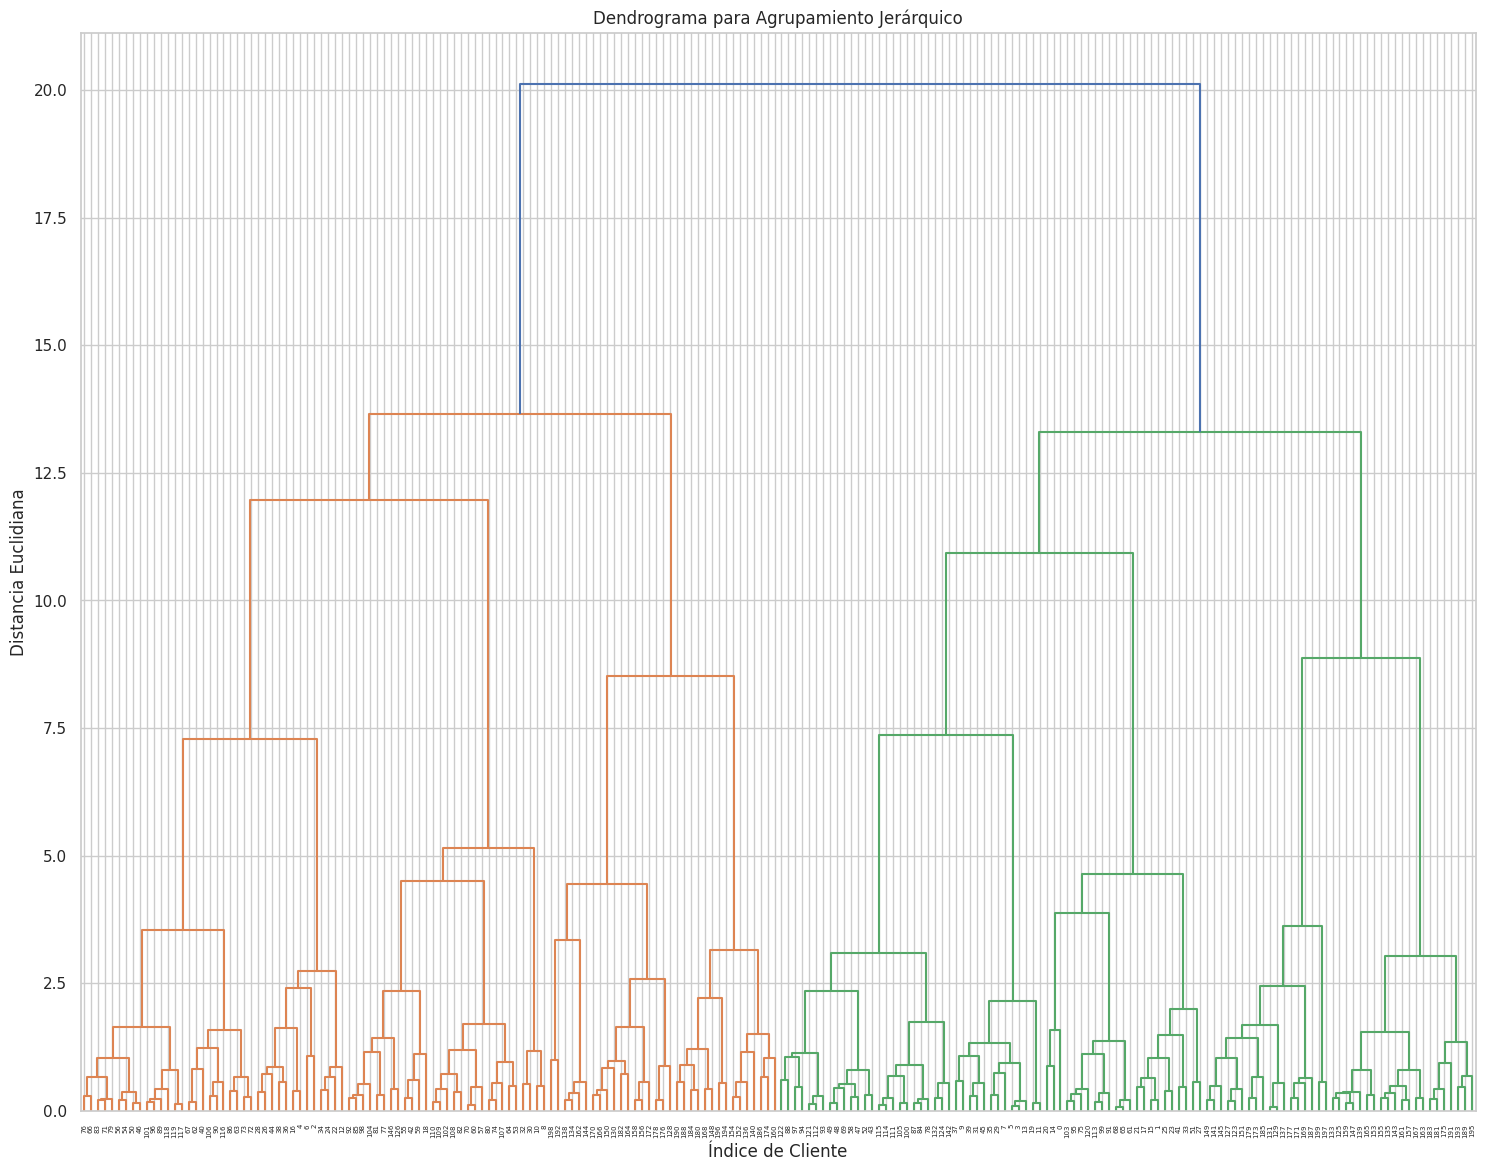

In [79]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Construcción del modelo de clustering jerárquico
linked = linkage(df_scaled, method='ward')

# Visualización del dendrograma
plt.figure(figsize=(18, 14))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma para Agrupamiento Jerárquico')
plt.xlabel('Índice de Cliente')
plt.ylabel('Distancia Euclidiana')
plt.show()

#### Entrenamiento del modelo de clustering jerárquico

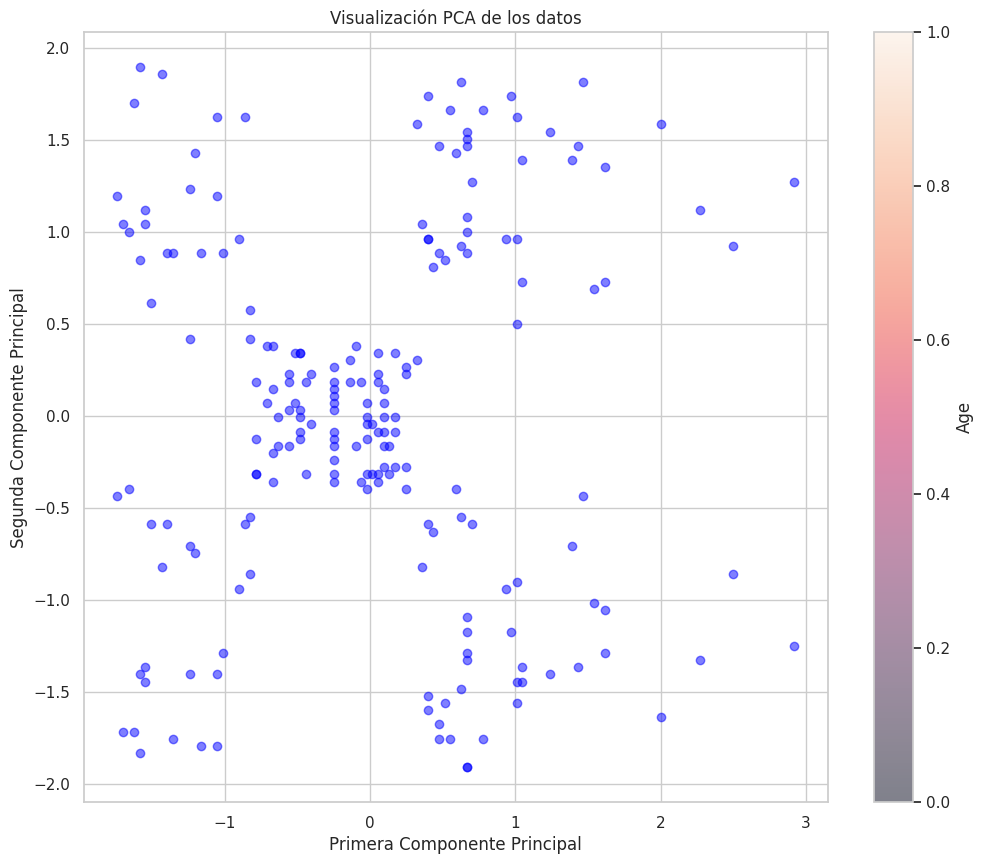

In [115]:
# Entrenamiento del modelo de clustering jerárquico
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Generar el dendrograma
linkage_matrix = linkage(df_pca, method='ward')

#x = df_pca['Annual Income (k$)']
#y = df_pca['Spending Score (1-100)']

x = df_scaled[:, 2]
y = df_scaled[:, 3]

plt.figure(figsize=(12, 10))
plt.scatter(x, y, c='blue', alpha=0.5)
plt.title('Visualización PCA de los datos')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.colorbar(label='Age') # Adds a colorbar to explain the color mapping
plt.show()

#### Creamos y obtenemos los clusters

In [113]:
# Obtener clusters
clusters = fcluster(linkage_matrix, t=4, criterion='maxclust')
df_mall_data['Cluster'] = clusters

# Verifica que la columna 'Cluster' ha sido creada
df_mall_data['Cluster'].value_counts()

,count
Cluster,
4,67
2,61
1,39
3,33


#### Validamos la columna de cluster creada y sus posibles resultados

In [114]:
# Validamos la columna de cluster creada y sus posibles resultados
df_mall_data.head(12)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,2
1,1,21,15,81,2
2,0,20,16,6,4
3,0,23,16,77,2
4,0,31,17,40,4
5,0,22,17,76,2
6,0,35,18,6,4
7,0,23,18,94,2
8,1,64,19,3,4
9,0,30,19,72,2


## 6. Evaluación del Modelo

**Objetivo:**

Evaluar la calidad del modelo utilizando métricas como el coeficiente de Silhouette y el índice de Calinski-Harabasz.


In [111]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

# Aplicar Agglomerative Clustering
model = AgglomerativeClustering(n_clusters=6, linkage='ward')
labels = model.fit_predict(df_scaled)

# Evaluación
silhouette = silhouette_score(df_scaled, labels)
calinski = calinski_harabasz_score(df_scaled, labels)
davies = davies_bouldin_score(df_scaled, labels)

print(f"Coeficiente de Silhouette: {silhouette:.3f}")
print(f"Índice de Calinski-Harabasz: {calinski:.3}")
print(f"Índice de Davies-Bouldin: {davies:.3f}")

Coeficiente de Silhouette: 0.310
Índice de Calinski-Harabasz: 70.2
Índice de Davies-Bouldin: 1.073


## 7. Visualización de Resultados

**Objetivo:**

Visualizar los clusters obtenidos mediante gráficos para analizar su separación y características.


#### Visualización de Clusters 2D

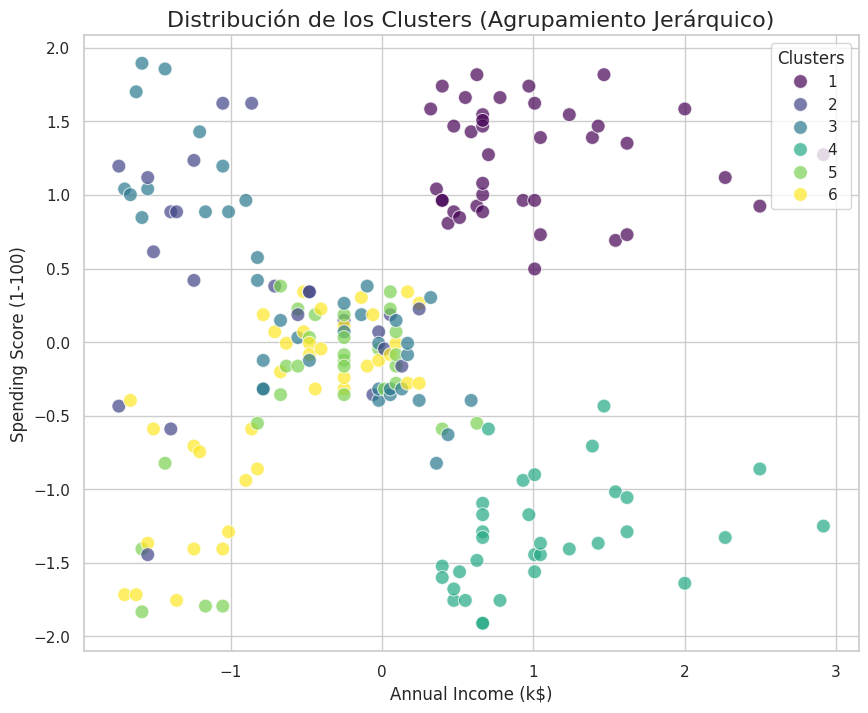

In [94]:
# Visualización de Clusters 2D
plt.figure(figsize=(10, 8))
# x = df_scaled['Annual Income (k$)']
# y = df_scaled['Spending Score (1-100)']
x = df_scaled[:, 2]
y = df_scaled[:, 3]
sns.scatterplot(x=x, y=y, hue=df_mall_data['Cluster'], palette="viridis", s=100, alpha=0.7)
plt.title("Distribución de los Clusters (Agrupamiento Jerárquico)", fontsize=16)
plt.xlabel("Annual Income (k$)", fontsize=12)
plt.ylabel("Spending Score (1-100)", fontsize=12)
plt.legend(title="Clusters", loc="upper right")
plt.show()

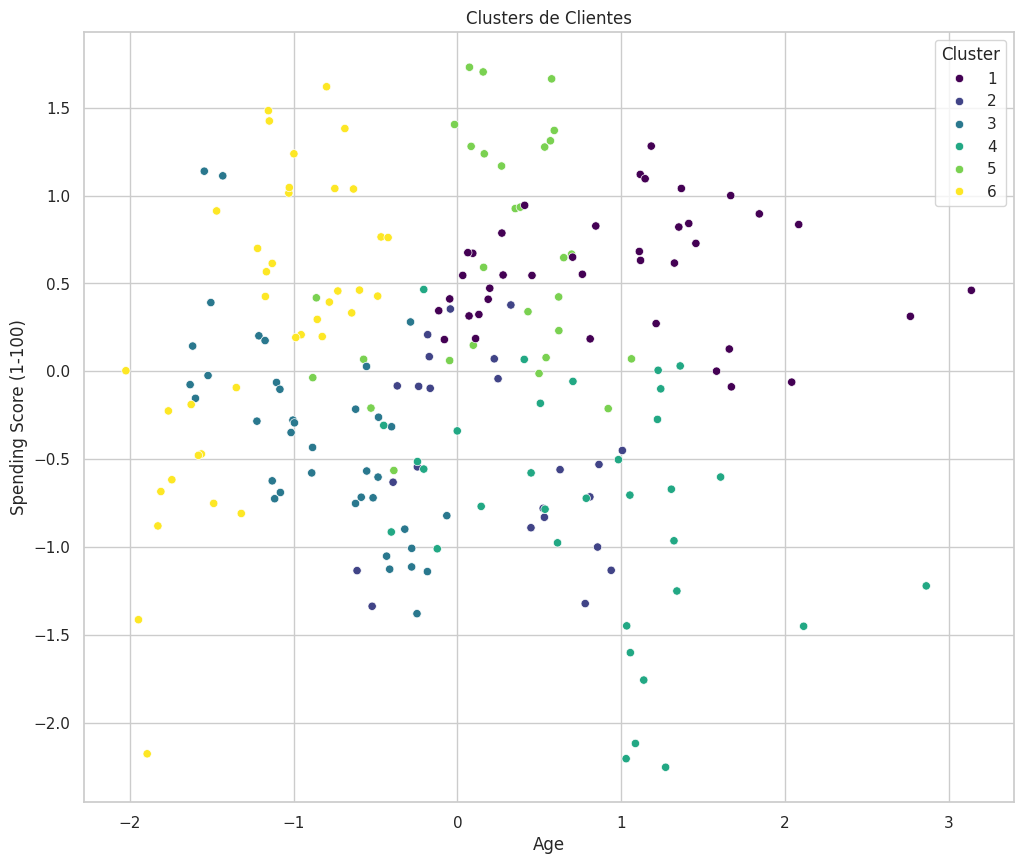

In [105]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x=df_pca['Age'], y=df_pca['Spending Score (1-100)'], hue=df_mall_data['Cluster'], palette='viridis')
plt.title("Clusters de Clientes")
plt.show()

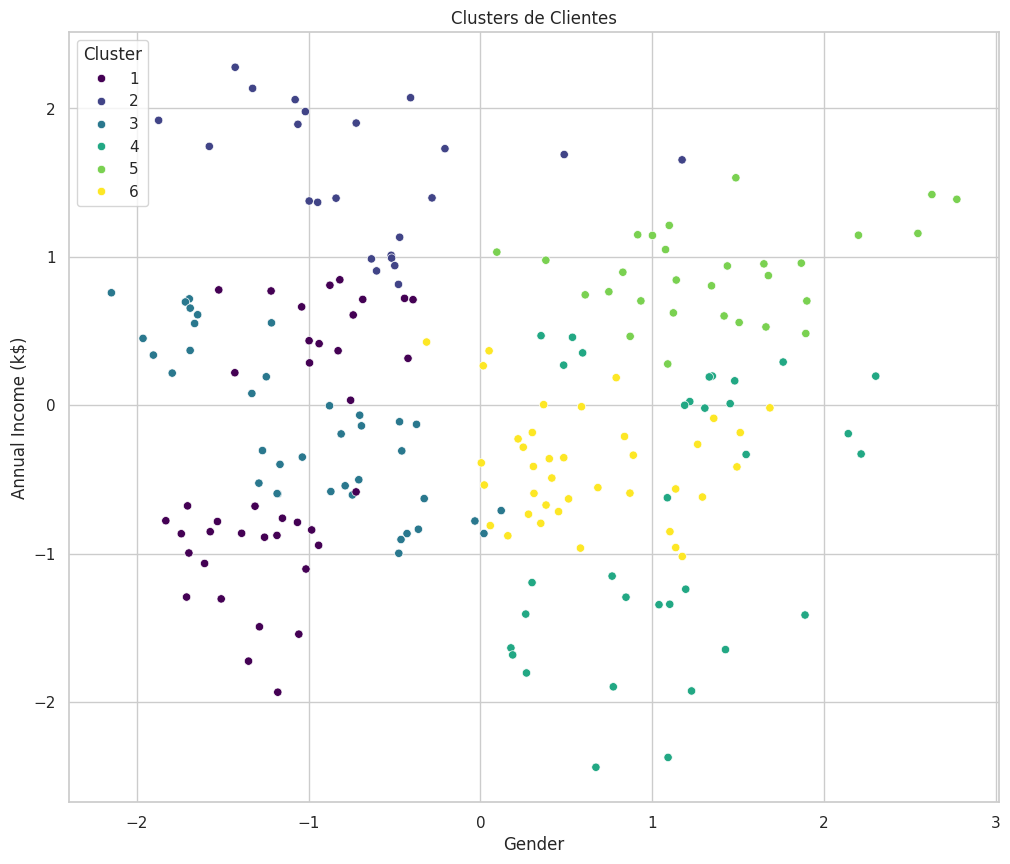

In [104]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x=df_pca['Gender'], y=df_pca['Annual Income (k$)'], hue=df_mall_data['Cluster'], palette='viridis')
plt.title("Clusters de Clientes")
plt.show()

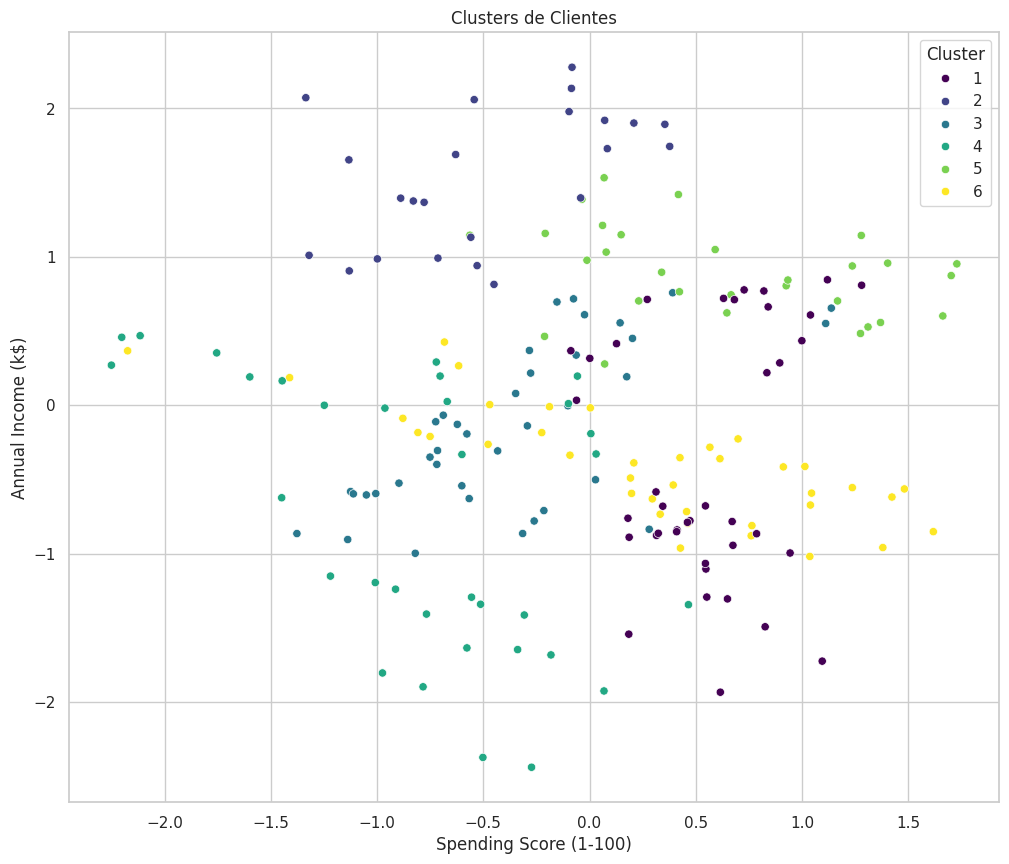

In [103]:
plt.figure(figsize=(12, 10))
sns.scatterplot(x=df_pca['Spending Score (1-100)'], y=df_pca['Annual Income (k$)'], hue=df_mall_data['Cluster'], palette='viridis')
plt.title("Clusters de Clientes")
plt.show()